In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install joblib
%pip install Pillow
%pip install scikit-image
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 558.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/12.8 MB 558.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/12.8 MB 558.9 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/12.8 MB 558.9 kB/s eta 0:00:22
   --- ------------------------------------ 1.0/12.8 MB 585.1 kB/s 

In [7]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from PIL import Image

In [8]:
# Veri yükleme ve ön izleme
# Özellikler ve etiketler dosyalarını yükleyin
features = np.load('../data/anjiyo_features.npy')
labels = np.load('../data/anjiyo_labels.npy')
print('Özellikler şekli:', features.shape)
print('Etiketler şekli:', labels.shape)
print('Etiketlerden örnekler:', np.unique(labels, return_counts=True))

Özellikler şekli: (262144, 27)
Etiketler şekli: (262144, 1)
Etiketlerden örnekler: (array([0, 1], dtype=uint8), array([234677,  27467]))


In [9]:
# Model yükleme ve tahmin
y_pred = None
try:
    model = joblib.load('../models/logreg_model.joblib')
    y_pred = model.predict(features)
    print('Tahminler başarıyla alındı.')
except Exception as e:
    print('Model yüklenemedi veya tahmin yapılamadı:', e)

Tahminler başarıyla alındı.


              precision    recall  f1-score   support

           0       0.92      0.50      0.65    234677
           1       0.13      0.65      0.22     27467

    accuracy                           0.51    262144
   macro avg       0.53      0.57      0.43    262144
weighted avg       0.84      0.51      0.60    262144



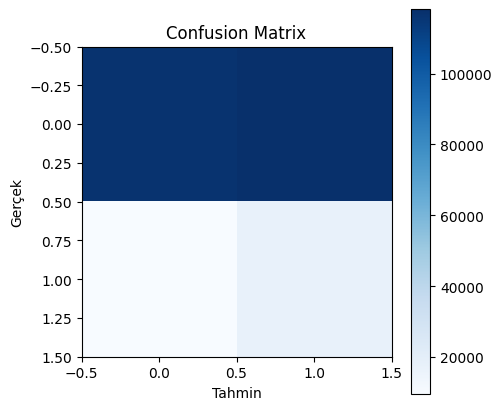

In [10]:
# Sonuçların görselleştirilmesi
if y_pred is not None:
    print(classification_report(labels, y_pred))
    cm = confusion_matrix(labels, y_pred)
    plt.figure(figsize=(5,5))
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.colorbar()
    plt.show()
else:
    print('Sonuçlar görselleştirilemiyor.')

## Test Görüntüsü ve Segmentasyon Maskesi Yan Yana Görselleştirme
Aşağıda test görüntüsü ve modelin ürettiği segmentasyon maskesi yan yana gösterilmektedir.

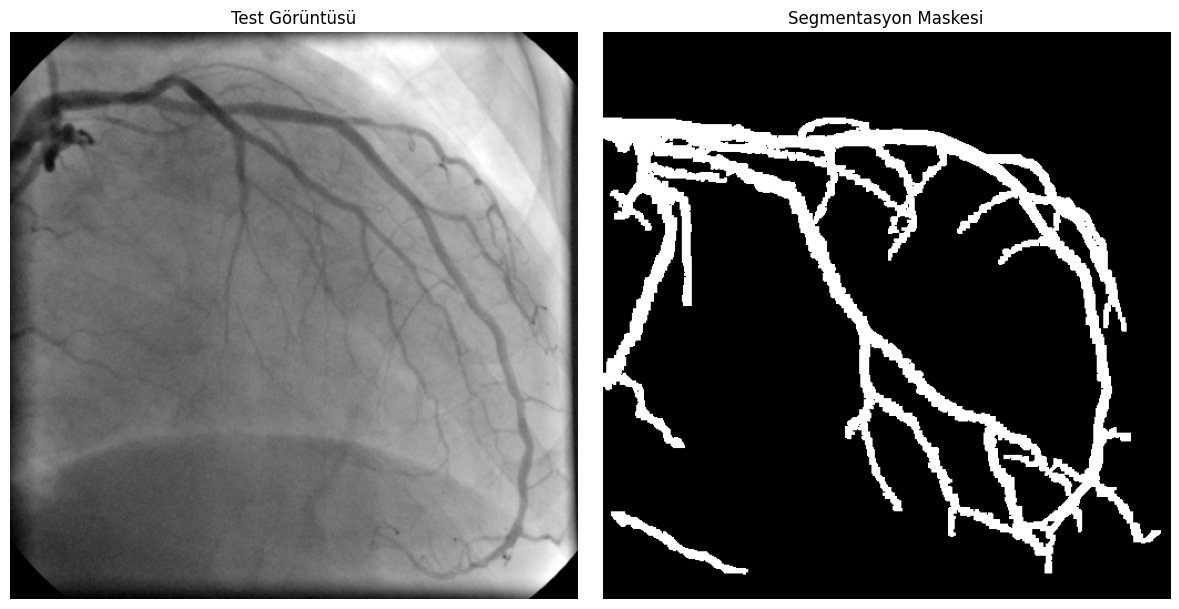

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Test görüntüsünü yükle
img = np.array(Image.open("../data/anjiyo_test.jpg"))
# Segmentasyon maskesini yükle
mask = np.array(Image.open("../results/anjiyo_test_mask.png"))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Test Görüntüsü')
axs[0].axis('off')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Segmentasyon Maskesi')
axs[1].axis('off')
plt.tight_layout()
plt.show()

## Eğitim ve Test Görüntüleri ile Segmentasyon Maskesi Yan Yana
Aşağıda eğitim görüntüsü, test görüntüsü ve modelin ürettiği segmentasyon maskesi yan yana gösterilmektedir.

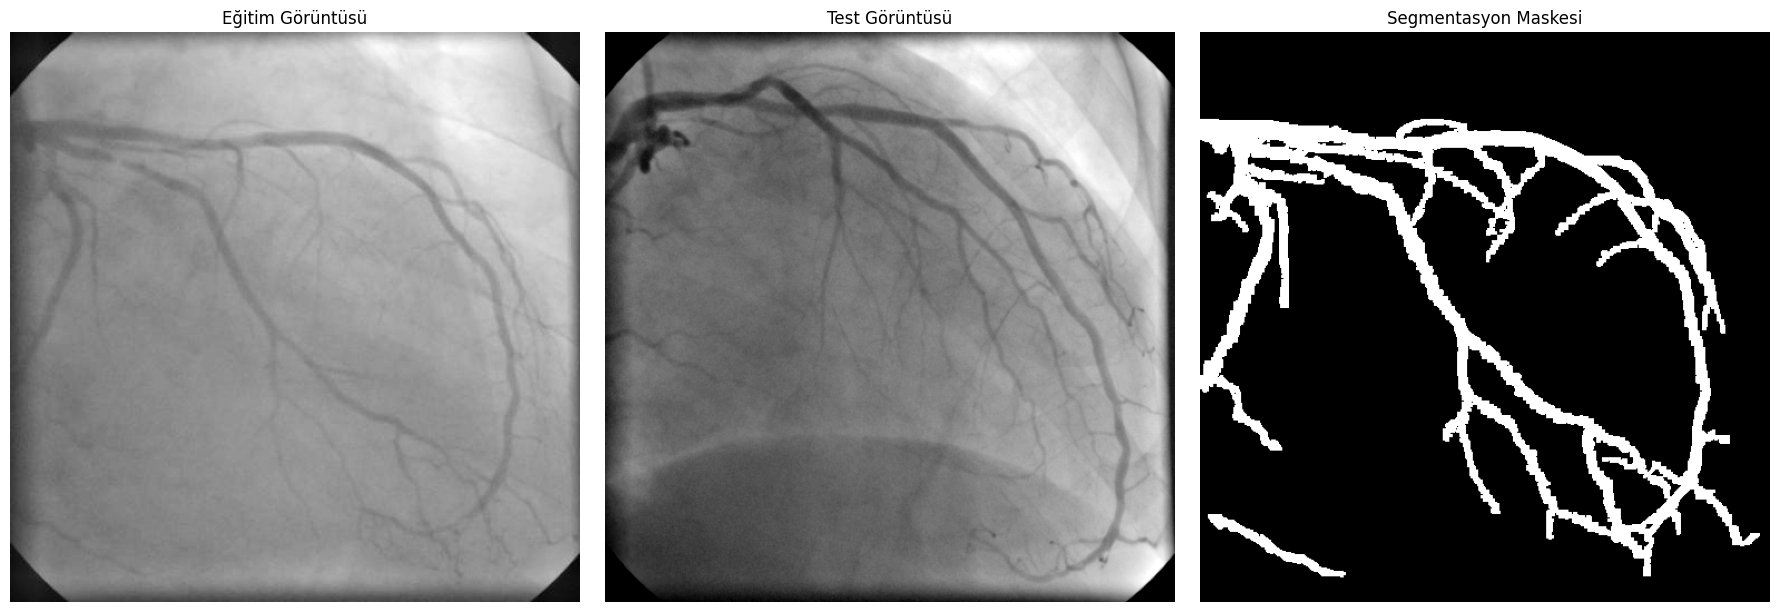

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Eğitim görüntüsünü yükle
train_img = np.array(Image.open("../data/anjiyo.jpg"))
# Test görüntüsünü yükle
test_img = np.array(Image.open("../data/anjiyo_test.jpg"))
# Segmentasyon maskesini yükle
mask = np.array(Image.open("../results/anjiyo_test_mask.png"))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(train_img, cmap='gray')
axs[0].set_title('Eğitim Görüntüsü')
axs[0].axis('off')
axs[1].imshow(test_img, cmap='gray')
axs[1].set_title('Test Görüntüsü')
axs[1].axis('off')
axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Segmentasyon Maskesi')
axs[2].axis('off')
plt.tight_layout()
plt.show()